In [1]:
from utils import load_data_from_csv, c_index
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import random
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus

In [2]:
X_train_org, X_test, y_train_org, y_test = load_data_from_csv(threshold=10, test_size=0.2)

In [3]:
print("X_train shape:", X_train_org.shape)
print("X_test shape:", X_test.shape)

X_train shape: (6863, 18)
X_test shape: (1716, 18)


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_org, y_train_org, test_size=0.25, random_state=42)

In [241]:
import pandas as pd
import numpy as np
from operator import itemgetter


def gini_continuous(data, col_name, label):
    def get_gini_index(cat_data):
        m = len(cat_data)
        num = 0.0

        # get all cat_data where label = True
        cat_data_true = cat_data[cat_data['time'] == True]
        # get all cat_data where label = False
        cat_data_false = cat_data[cat_data['time'] == False]

        p_true = len(cat_data_true) / m
        p_false = len(cat_data_false) / m

        gini = p_true * (1.0-p_true) + p_false *(1.0-p_false)

        return gini
        
        # return 1 - (len(cat_data_true) / m) ** 2 - (len(cat_data_false) / m) ** 2

        # for cat_num in cat_data.value_counts():
            # print(cat_num)
            # num = num + pow(1.0 * cat_num / m, 2)

        # return (1.0 - num)
        return 1

    # merge 2 dataframe data['col_name'] and label
    # convert label true, false to 1, 0
    # label = label.map(lambda x: 1 if x == 'True' else 0)
    data_t = pd.merge(data[col_name], label, left_index=True, right_index=True)

    data_t = data_t.dropna(axis=0, how="any")
    m = data_t.shape[0]
    gini_data = sorted(data_t[col_name].unique())
    gini = {}
    split_point = []

    

    for i in range(len(gini_data) - 1):
        split_val = (gini_data[i] + gini_data[i+1]) / 2.0
        split_point.append(split_val)


    for e in split_point:
        cat_0 = data_t[data_t[col_name] > e]
        cat_1 = data_t[data_t[col_name] <= e]

        
        gini_index = 1.0 * len(cat_0) / m * get_gini_index(cat_0) + \
                     1.0 * len(cat_1) / m * get_gini_index(cat_1)
        gini[e] = gini_index

    gini_sort = sorted(gini.items(), key=itemgetter(1))
    
    return gini_sort[0], get_gini_index(data_t)

In [263]:
gini_continuous(X_train, 'Pulse pressure', y_train)

((59.5, 0.29757631472343077), 0.310218378959164)

### Xét nhánh phải 

In [227]:
gini_continuous(X_train[X_train['Age'] > 64.5], 'Sex', y_train)

((1.5, 0.4536957798667496), 0.47123773337295527)

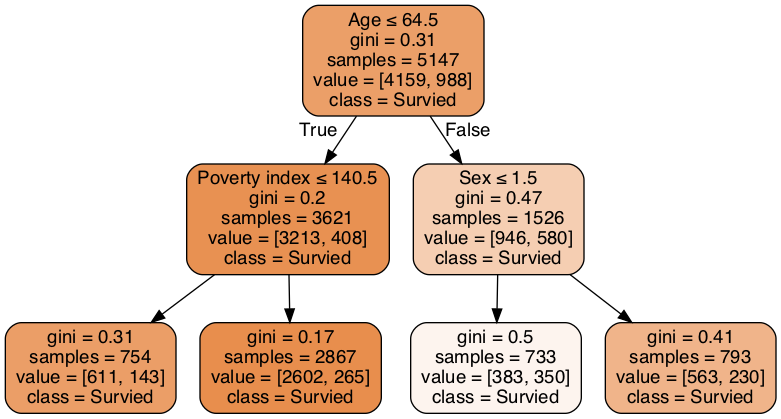

In [233]:
decision_tree_with_max_depth = DecisionTreeClassifier(max_depth=2, random_state=42)

decision_tree_with_max_depth.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(decision_tree_with_max_depth, feature_names=X_train.columns, out_file=dot_data,  
                filled=True, rounded=True, proportion=False, special_characters=True,
                impurity=True, class_names=['Survied', 'Died'], precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())